<a href="https://colab.research.google.com/github/viyas52/stock-market-prediction-using-twitter-sentiment-analysis/blob/main/MAJOR_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import preprocess
import numpy as np

data = pd.read_csv('train/stock_data.csv')

data = preprocess.Preprocess_Tweets(data)
display(data)

,Text,Sentiment,Text_Cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...
3,MNTA Over 12.00,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said are likely to suffer a ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below rs 46000 as book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,live sensex off day’s high up 600 points tests...


In [7]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

data['Vader_Scores'] = data['Text_Cleaned'].apply(lambda score: sid.polarity_scores(score)['compound'])
data['Vader_Prediction'] = data['Vader_Scores'].apply(lambda score: 1 if score >=0 else -1)

print('Vader Accuracy:', round((len(data[data['Sentiment']==data['Vader_Prediction']])/len(data)) *100, 2), '%', '\n')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Vader Accuracy: 66.48 % 



In [8]:
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords

StopWords = set([s.replace("'", '') for s in stopwords.words('english') if s not in ['not', 'up', 'down', 'above', 'below', 'under', 'over']])
print(StopWords)

data['Text_Processed'] = data['Text_Cleaned'].apply(lambda s: " ".join([word for word in s.split() if word not in StopWords]))
data['Text_Processed'] = data['Text_Processed'].str.strip()

display(data)

{'be', 'all', 'some', 'ourselves', 'mustn', 'on', 'at', 'your', 'the', 'youll', 'she', 'have', 'once', 'until', 'about', 'during', 'youre', 'had', 'from', 'further', 'where', 'again', 'an', 'mustnt', 'myself', 'did', 'most', 'no', 'is', 'yourselves', 'youve', 'for', 'wont', 'does', 'more', 'their', 'we', 'own', 'youd', 'were', 'they', 'havent', 'hadnt', 'those', 'himself', 'nor', 'hadn', 'its', 'theirs', 'his', 'then', 'arent', 'wouldn', 'are', 'll', 'will', 're', 'doesn', 'doing', 'itself', 'and', 'hasnt', 'each', 'needn', 'how', 'my', 'shouldnt', 'this', 'thatll', 'themselves', 't', 'who', 'having', 'isn', 'before', 'he', 'shan', 'or', 'what', 'in', 'couldnt', 'ain', 'with', 'aren', 'to', 'don', 'you', 'off', 'as', 'd', 'just', 'why', 'her', 'dont', 'if', 'few', 'ma', 'didnt', 'shant', 'our', 'them', 'while', 'mightnt', 'wasnt', 'which', 'am', 'into', 'do', 'such', 'it', 'only', 'him', 'been', 'neednt', 'hers', 'now', 've', 'o', 'yours', 'ours', 'has', 'by', 'out', 's', 'against', 'w

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Sentiment,Text_Cleaned,Vader_Scores,Vader_Prediction,Text_Processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,0.0000,1,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...,0.6249,1,aap movie 55 percent return fea geed indicator...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...,0.3612,1,id afraid short amzn looking like near monopol...
3,MNTA Over 12.00,1,mnta over 12.00,0.0000,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37,0.0000,1,oi over 21.37
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said are likely to suffer a ...,-0.7003,-1,industry body cii said likely suffer net reven...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below rs 46000 as book profits ami...,0.0258,1,prices slip below rs 46000 book profits amid l...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...,0.0000,1,workers bajaj auto agreed 10 percent wage cut ...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,live sensex off day’s high up 600 points tests...,0.0000,1,live sensex day’s high up 600 points tests 920...


Best alpha:  1.0   |  Best Score:  83.04


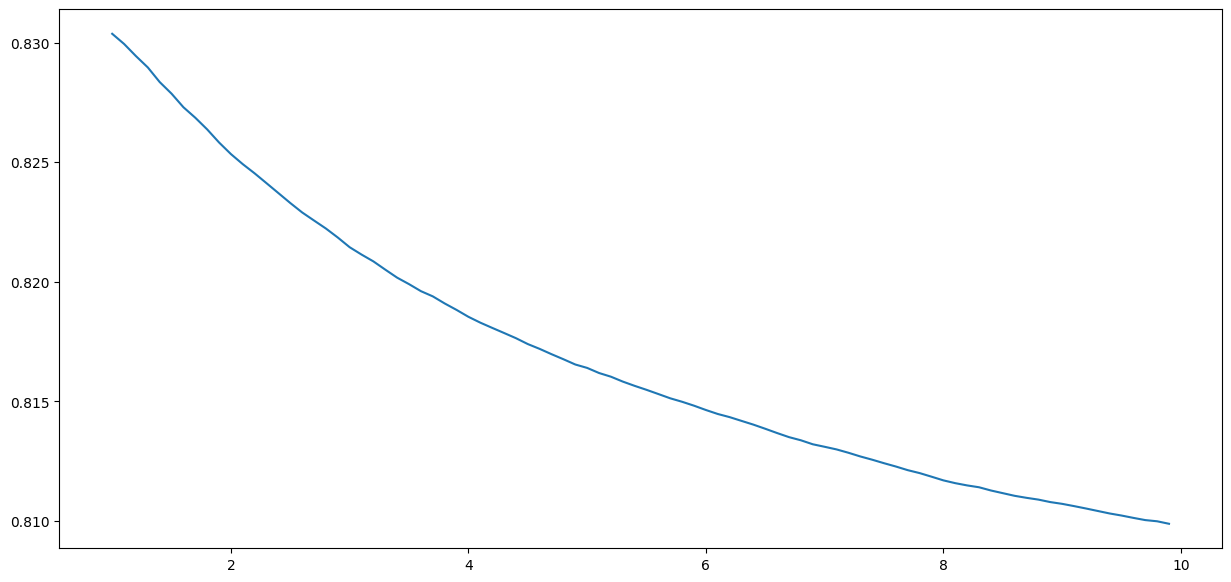

Naive-Bayes Accuracy: 66.78 %


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Split data into 80/20 train-test split
train_pct = .8
np.random.seed(1)
idx = np.random.permutation(len(data))

X_train = data['Text_Processed'].values[idx[:int(train_pct*len(data))]]
y_train = data['Sentiment'].values[idx[:int(train_pct*len(data))]]
y_train[y_train==-1] = 0
X_test = data['Text_Processed'].values[idx[int(train_pct*len(data)):]]
y_test = data['Sentiment'].values[idx[int(train_pct*len(data)):]]
y_test[y_test==-1] = 0


# Calculate TF-IDF for Naive Bayes classification
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)

# Get TF-IDF for Train and Test data
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)


# Define function to determine accuracy of model
def get_auc_CV(model):
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

# Initialize models with multiple alpha values to find best model
alphas = np.arange(1,10,0.1)
models = [MultinomialNB(alpha=i) for i in alphas]

# Find best performing model
accs = []
for model in models:
    accs.append(get_auc_CV(model))

accs = np.array(accs)

# Get best performing alpha value to continue with
best_alpha = round(alphas[accs.argmax()], 1)

# Print best alpha value and accuracy
print('Best alpha: ', best_alpha, '  |  Best Score: ', round(accs.max()*100, 2))

# Plot accuracies per alpha values
plt.figure(figsize=(15,7))
plt.plot(alphas, accs)
plt.show()

# Retrain best performing model
best_model = MultinomialNB(alpha=best_alpha)
best_model.fit(X_train_tfidf, y_train)

# Predict test data with best model
probs = best_model.predict_proba(X_test_tfidf)

# Print accuracy of best performing model on tweet sentiment analysis
print('Naive-Bayes Accuracy:', round(len(np.where(y_test == probs.argmax(axis=1))[0])/len(probs) * 100, 2), '%')